 # Plots for 'Data over the Kamb channel'
 
 ## Plan

1. overview map
2. REMA splodge
3. ApRES plot
4. radar map
3. icesat2 dots
4. a. Icesat2 crosssection lower
4. b. Icesat2 crosssection raise
5. a. Icesat1 and REMA crossections
5. b. other icesat1 and REMA

In [1]:
import rasterio as rio
import rasterio.mask
import fiona
import pandas as pd
import geopandas as gpd
from shapely.geometry import Polygon
import numpy as np
import os
import sys
import glob
import matplotlib.pyplot as plt
from scipy import interpolate
import xarray as xr
from shapely.geometry import Point, LineString, box

In [2]:
xmin, xmax, ymin, ymax = -382700, -374781.9, -734075.1, -721770.2
xgrid = np.arange(-382000,-374000,2000)


In [3]:
bed_gmt = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/gmtsurf_bed.npy')
x = np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/gmtsurf_x.npy')
y= np.load('/Users/home/whitefar/DATA/FIELD_ANT_19/POST_FIELD/RADAR_MAP/gmtsurf_y.npy')

In [4]:
gpr = gpd.read_file('/Volumes/arc_04/FIELD_DATA/K8621920/RES/PROCESSED_LINES/picked_bed.shp')
cross_channel_lines = ['line7p75','line7p5','line7p25','line7', 'line6','line5','lineAPREScross','line4','line3','line2','line1','line0']

gpr = gpr[gpr.camp=='KIS2'].copy()

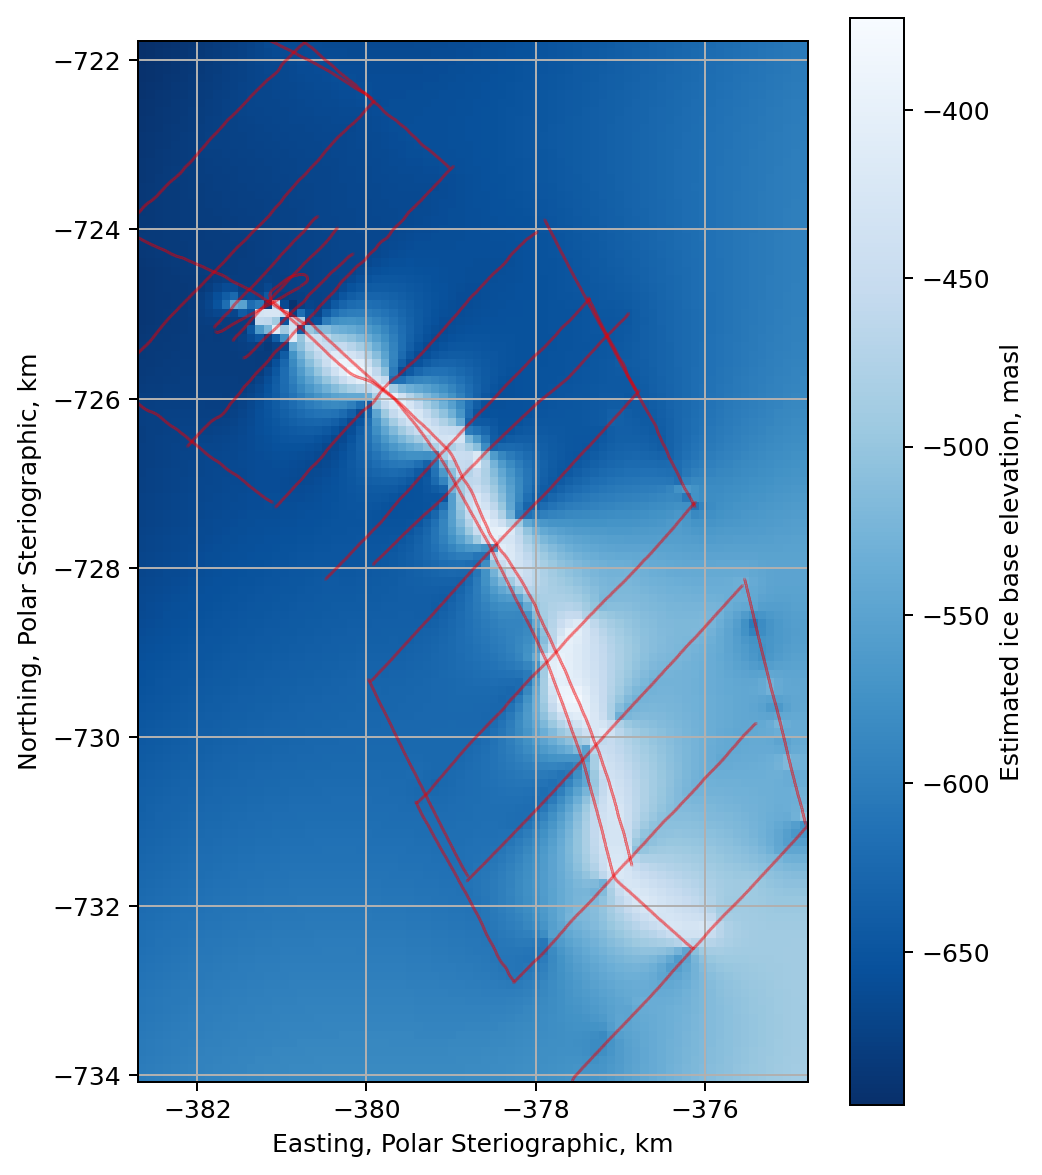

In [5]:
plt.figure( dpi=180,figsize=(6,8))
plt.imshow(np.flipud(bed_gmt),extent=[xmin/1000, xmax/1000, ymin/1000, ymax/1000], cmap='Blues_r')
plt.plot(gpr.x/1000,gpr.y/1000,'r.',label='radar profiles',markersize=0.05)

plt.xlim([xmin/1000, xmax/1000])
plt.ylim([ymin/1000, ymax/1000]) 
plt.xlabel('Easting, Polar Steriographic, km')
plt.ylabel('Northing, Polar Steriographic, km')
plt.xticks(xgrid/1000)
plt.grid()
# plt.legend()
cb = plt.colorbar()
cb.set_label('Estimated ice base elevation, masl')

plt.savefig('/Users/home/whitefar/ASSIGNMENTS-PUBLICATIONS-TALKS/channel_data_writeup/PLOTS/gmt_surface_interp.png')
plt.show()